## Explore the Dataset

In [4]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/home/rguktongle/Documents/DS-ML/DS-ML_UDEMY/disney_plus_titles.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


## Perform Text Analysis

In [8]:
# Summary of the dataset to understand the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   show_id                1368 non-null   object 
 1   type                   1368 non-null   object 
 2   title                  1368 non-null   object 
 3   director               928 non-null    object 
 4   cast                   1194 non-null   object 
 5   country                1193 non-null   object 
 6   date_added             1365 non-null   object 
 7   release_year           1368 non-null   int64  
 8   rating                 1366 non-null   object 
 9   duration               1368 non-null   object 
 10  listed_in              1368 non-null   object 
 11  description            1368 non-null   object 
 12  description_sentiment  1368 non-null   float64
dtypes: float64(1), int64(1), object(11)
memory usage: 139.1+ KB


In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

show_id                    0
type                       0
title                      0
director                 440
cast                     174
country                  175
date_added                 3
release_year               0
rating                     2
duration                   0
listed_in                  0
description                0
description_sentiment      0
dtype: int64

In [10]:
# Display basic statistics of numeric columns
df.describe()


,release_year,description_sentiment
count,1368.000000,1368.000000
mean,2002.348684,0.098366
std,22.127559,0.296196
min,1928.000000,-1.000000
25%,1998.000000,0.000000
50%,2011.000000,0.000000
75%,2018.000000,0.250000
max,2021.000000,1.000000


##  Cluster Analysis - Based on Type and Rating

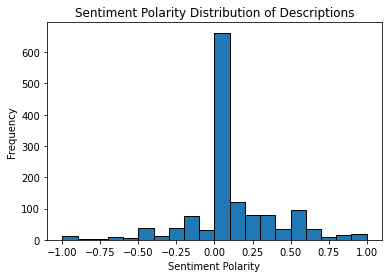

count    1368.000000
mean        0.098366
std         0.296196
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: description_sentiment, dtype: float64


In [6]:
# Check if the dataset has 'title' and 'description' columns
if 'title' in df.columns and 'description' in df.columns:
    # Analyze sentiment of descriptions
    df['description_sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity)
    
    # Plot sentiment distribution
    plt.hist(df['description_sentiment'], bins=20, edgecolor='k')
    plt.title('Sentiment Polarity Distribution of Descriptions')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

    # Display sentiment statistics
    print(df['description_sentiment'].describe())
else:
    print("Columns 'title' or 'description' not found in the dataset.")


## Time Series Analysis - Trend Analysis Based on Date Added

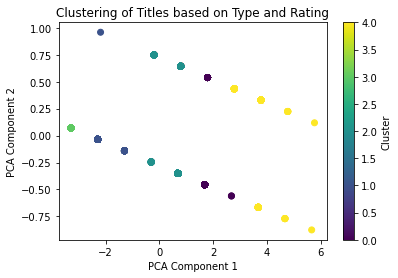

Cluster Centers:
 [[3.97111913e-01 5.00722022e+00]
 [3.48432056e-03 1.20905923e+00]
 [3.13984169e-01 3.81002639e+00]
 [1.11022302e-15 0.00000000e+00]
 [7.73684211e-01 6.84210526e+00]]

Count of Titles in Each Cluster:
0    277
1    287
2    379
3    235
4    190
Name: cluster, dtype: int64

Top Types and Ratings in Each Cluster:

Cluster 0:
Top Types:
Movie      167
TV Show    110
Name: type, dtype: int64
Top Ratings:
TV-PG    275
TV-Y       2
Name: rating, dtype: int64

Cluster 1:
Top Types:
Movie      286
TV Show      1
Name: type, dtype: int64
Top Ratings:
PG       227
PG-13     60
Name: rating, dtype: int64

Cluster 2:
Top Types:
Movie      260
TV Show    119
Name: type, dtype: int64
Top Ratings:
TV-G     307
TV-14     72
Name: rating, dtype: int64

Cluster 3:
Top Types:
Movie    235
Name: type, dtype: int64
Top Ratings:
G    235
Name: rating, dtype: int64

Cluster 4:
Top Types:
TV Show    147
Movie       43
Name: type, dtype: int64
Top Ratings:
TV-Y7       130
TV-Y         46
TV-Y

In [14]:
# Check if the dataset has 'type' and 'rating' columns
if 'type' in df.columns and 'rating' in df.columns:
    # Encode categorical 'type' and 'rating' columns
    le_type = LabelEncoder()
    le_rating = LabelEncoder()
    df['type_encoded'] = le_type.fit_transform(df['type'])
    df['rating_encoded'] = le_rating.fit_transform(df['rating'].astype(str))  # Convert to str to handle NaNs

    # Prepare features for clustering
    X = df[['type_encoded', 'rating_encoded']].dropna()  # Drop rows with missing values in these columns

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=5, random_state=42)
    df['cluster'] = kmeans.fit_predict(X)

    # Visualize clusters using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
    plt.title('Clustering of Titles based on Type and Rating')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

    # Display cluster centers
    print("Cluster Centers:\n", kmeans.cluster_centers_)

    # Count of titles in each cluster
    cluster_counts = df['cluster'].value_counts().sort_index()
    print("\nCount of Titles in Each Cluster:")
    print(cluster_counts)

    # Display top types and ratings in each cluster
    print("\nTop Types and Ratings in Each Cluster:")
    for cluster in range(5):
        cluster_data = df[df['cluster'] == cluster]
        top_types = cluster_data['type'].value_counts().head(3)
        top_ratings = cluster_data['rating'].value_counts().head(3)
        print(f"\nCluster {cluster}:")
        print("Top Types:")
        print(top_types)
        print("Top Ratings:")
        print(top_ratings)
else:
    print("Columns 'type' or 'rating' not found in the dataset.")


## Text Analysis - Sentiment Analysis on Descriptions

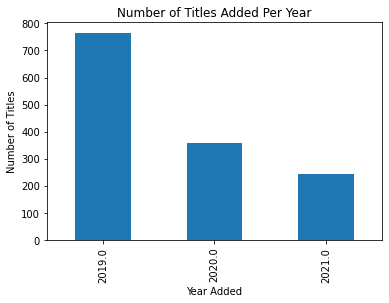

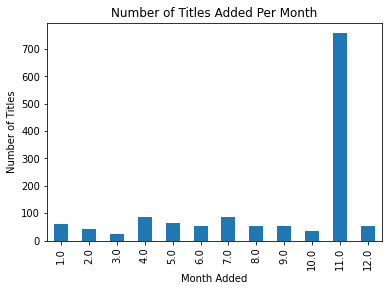

In [13]:
# Check if the dataset has 'date_added' column
if 'date_added' in df.columns:
    # Convert 'date_added' to datetime
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    
    # Extract year and month for trend analysis
    df['year_added'] = df['date_added'].dt.year
    df['month_added'] = df['date_added'].dt.month
    
    # Plot number of titles added per year
    df.groupby('year_added').size().plot(kind='bar')
    plt.title('Number of Titles Added Per Year')
    plt.xlabel('Year Added')
    plt.ylabel('Number of Titles')
    plt.show()

    # Plot number of titles added per month
    df.groupby('month_added').size().plot(kind='bar')
    plt.title('Number of Titles Added Per Month')
    plt.xlabel('Month Added')
    plt.ylabel('Number of Titles')
    plt.show()
else:
    print("Column 'date_added' not found in the dataset.")


## Saving the processed data

In [16]:
# Save the processed dataframe with sentiment and cluster information
df.to_csv('/home/rguktongle/Documents/DS-ML/DS-ML_UDEMY/disney_plus_titles.csv', index=False)
print("Processed data saved to 'disney_plus_titles_processed.csv'")


Processed data saved to 'disney_plus_titles_processed.csv'


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

warnings.filterwarnings('ignore')


In [24]:
# Load the dataset
file_path = '/home/rguktongle/Documents/DS-ML/DS-ML_UDEMY/disney_plus_titles.csv'
df = pd.read_csv(file_path)

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Filter out rows where 'date_added' is missing
df = df.dropna(subset=['date_added'])

# Set 'date_added' as the index
df.set_index('date_added', inplace=True)

# Resample the data to monthly frequency, counting the number of titles added each month
monthly_titles = df.resample('M').size()

# Display the resampled time series
monthly_titles.head()


date_added
2019-10-31      9
2019-11-30    731
2019-12-31     25
2020-01-31     44
2020-02-29     20
Freq: M, dtype: int64

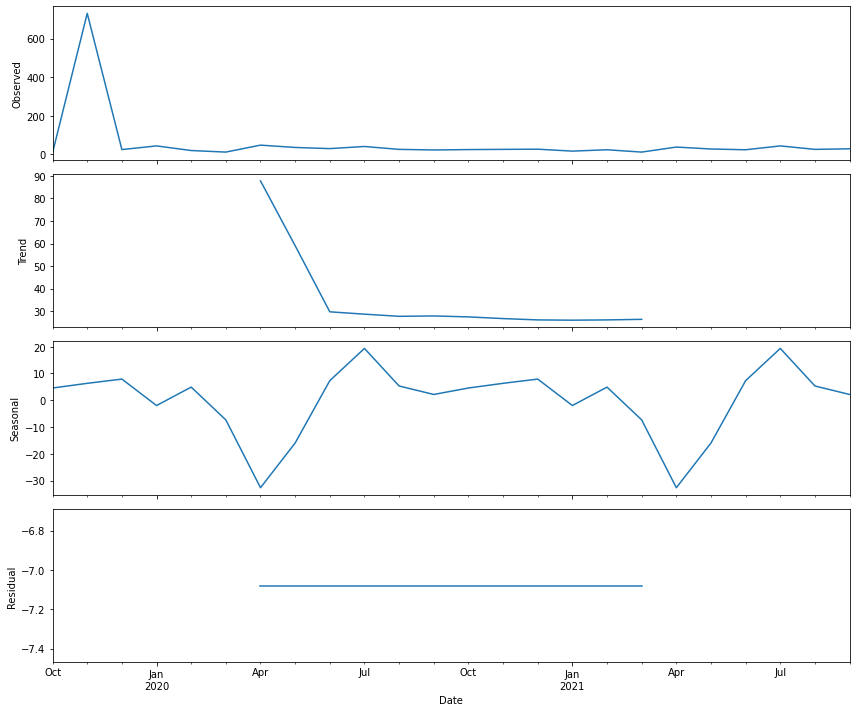

In [25]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(monthly_titles, model='additive')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()


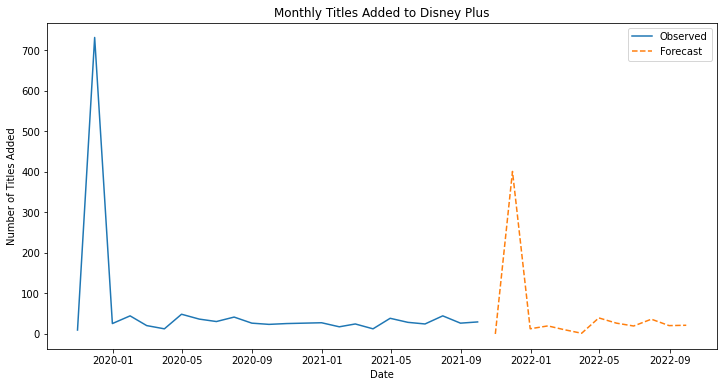

In [27]:
# Fit an Exponential Smoothing model
model = ExponentialSmoothing(monthly_titles, seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast the next 12 months
forecast = fit.forecast(12)

# Plot the original series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_titles, label='Observed')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.title('Monthly Titles Added to Disney Plus')
plt.legend()
plt.show()
